# AIM :- Information Retrieval from multimedia data.

To perfrom this practical we have choose topic of FOOD CLASSIFICATION

# Mouting drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
!cp "/content/MyDrive/My Drive/data.tar.gz" "data.tar.gz"

In [ ]:
!tar -xzf "data.tar.gz"
!rm "data.tar.gz"

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from keras.callbacks import Callback
from keras.backend import clear_session
from keras.models import Model, load_model
from keras.layers import Dense, Input, Flatten
from keras.applications import Xception

# Loading the images data

In [ ]:
def load_data(df):

    trainX, testX, valX = [], [], []
    trainY, testY, valY = [], [], []

    for i in range(len(df)):

        item = df.loc[i][0]
        current_label = np.array((df.loc[i])[1:])

        path = os.path.join('data/keras/images', item)
        list_of_imgs = [os.path.join(path, file) for file in os.listdir(path)]
        train_set = list_of_imgs[:30]
        val_set = list_of_imgs[30:40]
        test_set = list_of_imgs[40:]

        for file in train_set:
            img = cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_BGR2RGB), (224, 224))
            trainX.append(img)
            trainY.append(current_label)

        for file in val_set:
            img = cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_BGR2RGB), (224, 224))
            valX.append(img)
            valY.append(current_label)

        for file in test_set:
            img = cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_BGR2RGB), (224, 224))
            testX.append(img)
            testY.append(current_label)

    return (np.array(trainX), np.array(trainY), np.array(testX),
            np.array(testY), np.array(valX), np.array(valY))

In [ ]:
print('Loading Data...')
df = pd.read_csv('data/keras/clean_anno_reduced.csv')
trainX, trainY, testX, testY, valX, valY = load_data(df)
print('Data Loaded.')

Loading Data...
Data Loaded.


# Pre-processing the data (normalization)

In [ ]:
trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)
valX = valX.astype(np.float32)

trainY = trainY.astype(np.float32)
testY = testY.astype(np.float32)
valY = valY.astype(np.float32)

MEAN = np.mean(trainX, axis = (0,1,2))
STD = np.std(trainX, axis = (0,1,2))

for i in range(3):
    trainX[:, :, :, i] = (trainX[:, :, :, i] - MEAN[i]) / STD[i]
    testX[:, :, :, i] = (testX[:, :, :, i] - MEAN[i]) / STD[i]
    valX[:, :, :, i] = (valX[:, :, :, i] - MEAN[i]) / STD[i]

# Using Xception model for classification

In [ ]:
img = Input(shape = (224, 224, 3))
model = Xception(include_top=False,
                            weights='imagenet',
                            input_tensor=img,
                            pooling='avg')

83689472/83683744 [==============================] - 1s 0us/step


# Training the model

In [ ]:
final_layer = model.layers[-1].output

dense_layer_1 = Dense(128, activation = 'relu')(final_layer)
output_layer = Dense(10, activation = 'sigmoid')(dense_layer_1)

model = Model(inputs = img, outputs = output_layer)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, epochs = 25, validation_data = (valX, valY))

Epoch 1/25
53/53 [==============================] - 36s 680ms/step - loss: 0.5599 - accuracy: 0.0030 - val_loss: 0.5646 - val_accuracy: 0.0037
Epoch 2/25
53/53 [==============================] - 35s 661ms/step - loss: 0.3923 - accuracy: 0.0722 - val_loss: 0.5404 - val_accuracy: 0.0735
Epoch 3/25
53/53 [==============================] - 35s 653ms/step - loss: 0.3186 - accuracy: 0.1372 - val_loss: 0.5731 - val_accuracy: 0.1250
Epoch 4/25
53/53 [==============================] - 35s 661ms/step - loss: 0.2441 - accuracy: 0.1659 - val_loss: 0.6021 - val_accuracy: 0.0699
Epoch 5/25
53/53 [==============================] - 35s 659ms/step - loss: 0.2150 - accuracy: 0.1874 - val_loss: 0.7845 - val_accuracy: 0.0607
Epoch 6/25
53/53 [==============================] - 35s 657ms/step - loss: 0.1847 - accuracy: 0.1909 - val_loss: 0.5361 - val_accuracy: 0.1121
Epoch 7/25
53/53 [==============================] - 35s 662ms/step - loss: 0.1627 - accuracy: 0.1826 - val_loss: 0.7219 - val_accuracy: 0.0331

# Saving weights for future usage

In [ ]:
model.save_weights("model.h5")

In [ ]:
cp "model.h5" '/content/MyDrive/My Drive/multilabel'

# Visualization of loss

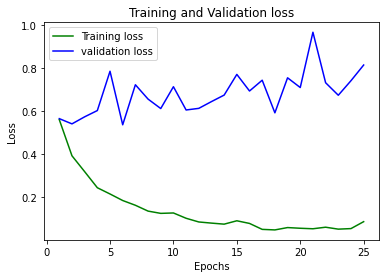

In [ ]:
from matplotlib import pyplot as plt
loss_train = model.history.history['loss']
loss_val = model.history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# For Testing Purpose

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

# Assigning the trained weights to the same model used for training for testing

In [ ]:
img = Input(shape = (224, 224, 3))
model = Xception(include_top=False,
                            weights='imagenet',
                            input_tensor=img,
                            pooling='avg')

In [ ]:
final_layer = model.layers[-1].output

dense_layer_1 = Dense(128, activation = 'relu')(final_layer)
output_layer = Dense(10, activation = 'sigmoid')(dense_layer_1)

model = Model(inputs = img, outputs = output_layer)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.load_weights("/content/MyDrive/My Drive/multilabel/model.h5")

# Uploading images for checking

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 42E9as7NaTaAi4A6JcuFwG-1200-80.jpg to 42E9as7NaTaAi4A6JcuFwG-1200-80 (1).jpg
Saving download.jpg to download.jpg


In [ ]:
labels = ['healthy','junk','dessert','appetizer','mains','soups','carbs','protein','fats','meat']

# Output of the model

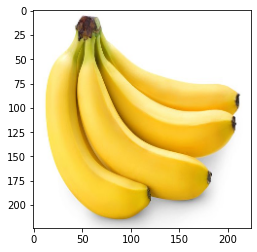

healthy 91.26929044723511 %
junk 0.06209079292602837 %
dessert 28.54446768760681 %
appetizer 97.66989946365356 %
mains 0.024921188014559448 %
soups 85.77138781547546 %
carbs 98.74316453933716 %
protein 0.8987255394458771 %
fats 0.17825663089752197 %
meat 0.0016698459148756228 %


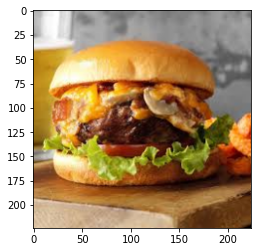

healthy 99.55220222473145 %
junk 0.007123984687495977 %
dessert 5.910038203001022 %
appetizer 98.99641871452332 %
mains 0.02024320710916072 %
soups 75.30407309532166 %
carbs 91.06002449989319 %
protein 80.00509738922119 %
fats 0.09565983200445771 %
meat 0.010294974345015362 %


In [ ]:
filename = uploaded.keys()
from matplotlib import pyplot as plt
for i in filename:
    img = cv2.resize(cv2.cvtColor(cv2.imread(i, 1), cv2.COLOR_BGR2RGB), (224, 224))
    plt.imshow(img)
    plt.show()
    img = img.reshape(-1,224,224,3)
    prediction = model.predict(img)
    for i in range(10):
        print(labels[i],prediction[0][i]*100,"%")

# Learning outcomes

1. I got to learn how the Information can be retrieved from images data also.
2. I got to learn how we can apply advanced techniques like ML-DL algorithms for the same purpose.
3. I got to learn how we can use image data for various purposes.